<a href="https://colab.research.google.com/github/angiecoronel12/Proyecto_AI_Accidents/blob/main/Accident_Severity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENTREGA 2 DEL PROYECTO IA

PREDICCIÓN DE LA SEVERIDAD DE UN ACCIDENTE DE TRÁNSITO EN FUNCIÓN DEL TIPO DE VEHÍCULO

Presentado por: 

LIZETH GIRALDO VELEZ
CC:1001237603

ANGIE LISETH CORONEL YELA 
CC: 108533329


## 1. EXPLORACION DE LOS DATOS 

In [ ]:
https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Lizethgv20/Proyecto_AI_Accidents/blob/main/NOTEBOOK.ipynb)

SyntaxError: ignored

### 1.1 Carga de los datos desde Kaggle

In [ ]:
 !pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lizethgiraldovelez","key":"6229669b0ff403256c82a8cd6c8ebf5a"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d benoit72/uk-accidents-10-years-history-with-many-variables

 92% 94.0M/103M [00:00<00:00, 123MB/s]
100% 103M/103M [00:00<00:00, 113MB/s] 


In [ ]:
!unzip uk-accidents-10-years-history-with-many-variables;

Archive:  uk-accidents-10-years-history-with-many-variables.zip
  inflating: Accidents0514.csv       
  inflating: Casualties0514.csv      
  inflating: Road-Accident-Safety-Data-Guide.xls  
  inflating: Vehicles0514.csv        


In [ ]:
# Se importan las librerias necesarias para este trabajo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### 1.2 Lectura y primer análisis de los Dataset

In [ ]:
#Cargar los datos
df_accidents = pd.read_csv("Accidents0514.csv")
df_accidents = df_accidents.copy()

df_vehicles = pd.read_csv("Vehicles0514.csv")
df_vehicles = df_vehicles.copy()

df_victims = pd.read_csv("Casualties0514.csv")
df_victims = df_victims.copy()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_accidents

In [ ]:
df_vehicles

In [ ]:
df_victims

### 1.3 Datos faltantes en cada uno de los datasets

Los datos faltantes en el dataset de estudio se encuentran reportados con un "-1"


In [ ]:
#Se muestran los datos faltantes del Dataset de accidents
for i in df_accidents.columns:

  Nan_accidents = str((df_accidents[i]==-1).sum())
  print(i + ': ' + Nan_accidents)

In [ ]:
#Se muestran los datos faltantes del Dataset de vehicles
for j in df_vehicles.columns:

  Nan_vehicles = str((df_vehicles[j]==-1).sum())
  print(j + ': ' + Nan_vehicles)

In [ ]:
#Se muestran los datos faltantes del Dataset de victims
for k in df_victims.columns:

  Nan_victims = str((df_victims[k]==-1).sum())
  print(k + ': ' + Nan_victims)

## 2. Preprocesamiento de los datos

In [ ]:
#Se reemplazan los -1 por Nan

df_accidents.replace(-1,np.nan,inplace=True) 
df_vehicles.replace(-1,np.nan,inplace=True) 
df_victims.replace(-1,np.nan,inplace=True) 

### 2.1 Identificacion de las variables y sustitucion de los datos

**Variables numérica, se reemplazan los valores faltantes por el promedio .mean()**

In [ ]:
num_variables_accidents = ["Longitude", "1st_Road_Number", "Junction_Detail", "2nd_Road_Number"]
for i in num_variables_accidents:
  df_accidents[i] = df_accidents[i].fillna(df_accidents[i].mean()) 

In [ ]:
num_variables_victims = ["Age_of_Casualty", "Age_Band_of_Casualty"]
for i in num_variables_victims:
  df_victims[i] = df_victims[i].fillna(df_victims[i].mean())

**Variables categóricas, se reemplazan los valores faltantes por la moda .mode()**

In [ ]:
df_vehicles["Vehicle_Type"].value_counts() #Ver cantidad de datos de cada valor

In [ ]:
cat_variables_accidents = ["Junction_Control", "2nd_Road_Class", "Pedestrian_Crossing-Human_Control", "Pedestrian_Crossing-Physical_Facilities","Weather_Conditions", "Road_Surface_Conditions", "Special_Conditions_at_Site", "Carriageway_Hazards", "Did_Police_Officer_Attend_Scene_of_Accident"]
for i in cat_variables_accidents:
  print(f" Mode : {df_accidents[i].mode()}")
  df_accidents[i] = df_accidents[i].fillna(df_accidents[i].mode().iloc[0]) #En caso de que la moda sean dos categorias se elije la primera

In [ ]:
cat_variables_vehicles = ["Vehicle_Type", "Towing_and_Articulation", "Vehicle_Manoeuvre", "Vehicle_Location-Restricted_Lane", "Junction_Location", "Skidding_and_Overturning", "Hit_Object_in_Carriageway", "Vehicle_Leaving_Carriageway", "Hit_Object_off_Carriageway" , "1st_Point_of_Impact", "Was_Vehicle_Left_Hand_Drive?", "Journey_Purpose_of_Driver", "Sex_of_Driver", "Age_of_Driver", "Age_Band_of_Driver", "Engine_Capacity_(CC)", "Propulsion_Code", "Age_of_Vehicle", "Driver_IMD_Decile", "Driver_Home_Area_Type"]
for i in cat_variables_vehicles:
  print(f" Mode : {df_vehicles[i].mode()}")
  df_vehicles[i] = df_vehicles[i].fillna(df_vehicles[i].mode().iloc[0]) #En caso de que la moda sean dos categorias se elije la primera

In [ ]:
cat_variables_victims = ["Sex_of_Casualty", "Pedestrian_Location", "Pedestrian_Movement", "Car_Passenger", "Bus_or_Coach_Passenger", "Pedestrian_Road_Maintenance_Worker", "Casualty_Home_Area_Type"]
for i in cat_variables_victims:
  print(f" Mode : {df_victims[i].mode()}")
  df_victims[i] = df_victims[i].fillna(df_victims[i].mode().iloc[0]) #En caso de que la moda sean dos categorias se elije la primera

## 3. Modelos e iteraciones 

### 3.1 Analisis de la variable objetivo

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


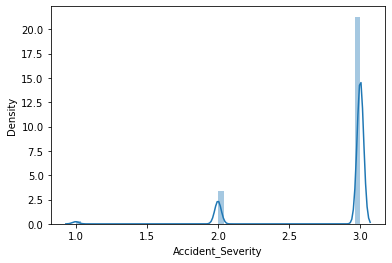

In [ ]:
sns.distplot(df_accidents['Accident_Severity'])

### 3.2 Generación tabla de variables finales de entrada y salida del modelo

In [ ]:
# df_victims[df_victims["Accident_Index"] == "20144100J0489"]
df_vehicles_cleaned = df_vehicles.groupby("Accident_Index").first().reset_index()
df_victims_cleaned = df_victims.groupby("Accident_Index").first().reset_index()

In [ ]:
print(df_accidents.shape)
print(df_victims_cleaned.shape)
print(df_vehicles_cleaned.shape)
# "Accident_Index"

(1640597, 32)
(1640597, 15)
(1640597, 22)


Unimos el dataset con la primary key "Accident_Index" y posteriormente se eliminan las variables que no son de interes 

In [ ]:
df_model_variables = df_accidents.merge(df_victims_cleaned,how="inner",on="Accident_Index").merge(df_vehicles_cleaned,how="inner",on="Accident_Index")

In [ ]:
df_model_variables.drop(['Accident_Index','Did_Police_Officer_Attend_Scene_of_Accident','Sex_of_Casualty',
                         'Sex_of_Driver','1st_Road_Class','2nd_Road_Number','Pedestrian_Crossing-Physical_Facilities',
                           'Casualty_Type','Pedestrian_Crossing-Human_Control','1st_Road_Number','Junction_Control',
                         'Bus_or_Coach_Passenger','Day_of_Week','Longitude','Was_Vehicle_Left_Hand_Drive?','Location_Easting_OSGR',
                         'Propulsion_Code','Vehicle_Location-Restricted_Lane','Journey_Purpose_of_Driver','Car_Passenger','Driver_IMD_Decile',
                         'Age_Band_of_Casualty','Age_Band_of_Driver','Latitude','Location_Northing_OSGR','Age_of_Driver','Age_of_Casualty',
                         'Local_Authority_(District)','Police_Force','Pedestrian_Movement','Casualty_Home_Area_Type','Pedestrian_Location',
                         'Casualty_Class','Driver_Home_Area_Type','2nd_Road_Class','Number_of_Vehicles','Light_Conditions',
                         'Vehicle_Leaving_Carriageway','Casualty_Reference','Number_of_Casualties','Pedestrian_Road_Maintenance_Worker',
                         'Local_Authority_(Highway)','Date','Time','LSOA_of_Accident_Location'],axis = 1,inplace=True)


### 3.3 División del dataset en Train & Test

Se divide el dataset con un 30% de los datos para validacion y 70% para entrenamiento

In [ ]:
y = df_model_variables['Accident_Severity'].values
X= df_model_variables.drop('Accident_Severity',axis=1)

test_size = 0.3
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=test_size,random_state=1)
print(X_train.shape, X_test.shape)

(1148417, 21) (492180, 21)


### 3.4 Aplicacion de los Metodos Supervisados

In [ ]:
estimator1 = LinearRegression()
estimator2 = DecisionTreeRegressor(max_depth=5)
estimator3 = RandomForestRegressor(n_estimators = 2,max_depth = 5)

In [ ]:
def report_cv_score(z):
    
    #RMSE en prueba y entrenamiento
    lr_ts_score = z['test_score']*(-1)
    lr_tr_score = z['train_score']*(-1)
    lin_rmse_ts = np.sqrt(lr_ts_score)
    lin_rmse_tr = np.sqrt(lr_tr_score)
    print("RMSLE Test: ", "{:.5f}".format(np.mean(lin_rmse_ts)), "(±", "{:.8f}".format(np.std(lin_rmse_ts)),")")
    print("RMSLE Train: ", "{:.5f}".format(np.mean(lin_rmse_tr)), "(±", "{:.8f}".format(np.std(lin_rmse_tr)),")")

In [ ]:
test_size = 0.3
val_size  = test_size/(1-test_size)
zscores = []
estimators = [estimator1, estimator2, estimator3]
for estimator in estimators:
    print("---------")
    z = cross_validate(estimator, X_train, y_train, return_train_score=True, return_estimator=False,
                       scoring="neg_mean_squared_error", cv=ShuffleSplit(n_splits=10, test_size= val_size))
    report_cv_score(z)
    zscores.append(np.mean(np.sqrt(z['test_score']*(-1))))
best = np.argmin(zscores)
print ("Seleccionado: ", best)
best_estimator = estimators[best]
print ("\n Mejor modelo: ")
print (best_estimator)

---------


KeyboardInterrupt: ignored

**Se aplica el mejor modelo obtenido para el estudio: Decision TreeRegressor**

In [ ]:
parametros = {'max_depth': [2,5,8,12,15]}


decission_tree = GridSearchCV(estimator = estimator2,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size), 
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

decission_tree.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.4285714285714286,
       train_size=None),
             estimator=DecisionTreeRegressor(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 12, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
print("Mejor estimador Decision Tree: ",decission_tree.best_estimator_)
print("Mejores parámetros para el estimador Decision Tree: ", decission_tree.best_params_)

Mejor estimador Decision Tree:  DecisionTreeRegressor(max_depth=8)
Mejores parámetros para el estimador Decision Tree:  {'max_depth': 8}


In [ ]:
Des_tree = DecisionTreeRegressor(max_depth=8)
Des_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [ ]:
#Función para calcular el RMSLE de los modelos implementados
from sklearn.metrics import mean_squared_error
def RMSLE(y_actual, y_pred):
    
    return np.sqrt(mean_squared_error(y_actual, y_pred))

In [ ]:
#Resultado del RMSLE para el mejor modelo obtenido
print('RMSLE del Decision Tree en entrenamiento: ',"{:.5f}".format(RMSLE((y_train) , (Des_tree.predict(X_train)))))
print('RMSLE del Decision Tree seleccionado: ',"{:.5f}".format(RMSLE(y_test , Des_tree.predict(X_test))))

RMSLE del Decision Tree en entrenamiento:  0.14001
RMSLE del Decision Tree seleccionado:  0.14037


**Se anexa el analisis de la correlacion entre las variables **

In [ ]:
#funcion de correlacion de las variables
corr_matrix_train = df_model_variables.corr()

In [ ]:
#Gráfico de la matriz de correlaciones
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix_train, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [ ]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = pd.DataFrame(corr_matrix_train["Accident_Severity"].sort_values(ascending=False))
target_corr_df 

,Accident_Severity
Accident_Severity,1.000000
Casualty_Severity,0.935797
Vehicle_Reference_x,0.110146
Junction_Detail,0.045987
Junction_Location,0.043687
Weather_Conditions,0.022580
Vehicle_Type,0.011229
Road_Surface_Conditions,0.011197
Special_Conditions_at_Site,0.002063
Engine_Capacity_(CC),0.001557
